# Demo for Lecture 7
- Linear Perceptron
- SVM

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Perceptron Algorithm Demo
This algorithm is simple and provides a great intuition for how to use your data to find a great linear binary classifier. The perceptron algorithm is an __iterative__ algorithm. This means that we will constantly update our classifer __w__ until it performs well on our training data. Intuitively, we want use the points that our incorrectly classifies to help develop a better classifer. Lets see how our model improves across iterations:

In [2]:
#Plots our data points and Classifier
def plot_perceptron(X, w, c):
    plt.scatter(X[:,0], X[:,1], color=c)
    left = min(X[:,0])
    right = max(X[:,0])
    if w[2] != 0:
        plt.plot(np.linspace(left, right, num=50), [-(w[2] + w[0]*x)/w[1] for x in np.linspace(left, right, num=50)])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Perceptron Learning Example')
    plt.xlim([-3,3])
    plt.ylim([-4,4])
    plt.show()
    plt.close()


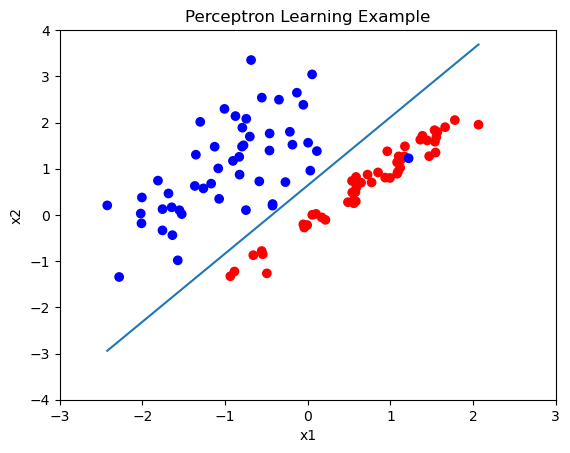

In [3]:
n = 100 # number of data points
lin_df = pd.read_csv("/Users/denizbt/Documents/info1998/resources/data/2d-lin-separable-data.csv")

X = lin_df[['X1', 'X2']].to_numpy()
offset = np.ones((n,1))
X = np.hstack((X, offset))

y = lin_df['Y1']
c = []
for i in range(n):
    if y[i] > 0:
        c.append('r')
    else:
        c.append('b')

model = Perceptron()
model.fit(X=lin_df[['X1', 'X2']], y=lin_df['Y1'])
w_true = np.append(model.coef_[0], model.intercept_[0])

plot_perceptron(X, w_true, c)

#### As you can see above, our goal is to find the line above that linearly separates our blue data points from our red data points. Let's use the perceptron algorithm to do this:

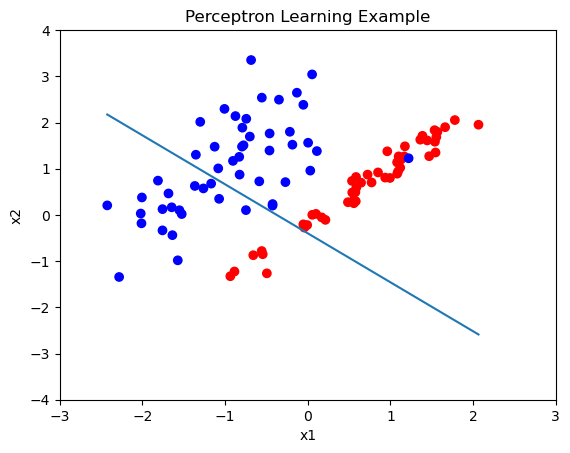

In [8]:
#initialize random normal vector w
w = np.random.randn(3)
#function that returns the index of a point that is missclassifed
def find_missclassified(w):
    for it in range(10000):
        i = np.random.randint(0, n)
        if y[i]*(X[i,:].dot(w)) <= 0:
            return i
    return None

plot_perceptron(X, w, c)

79
Updating perceptron


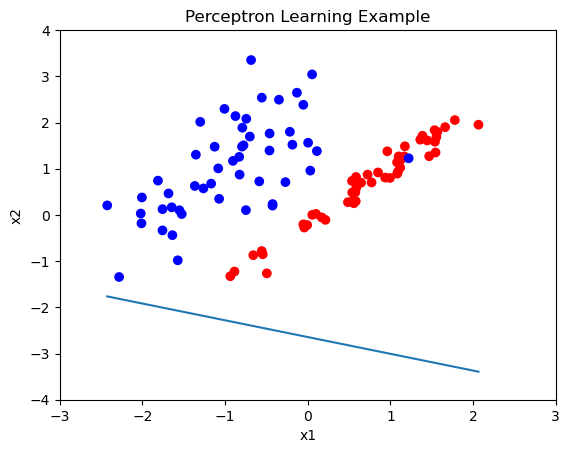

In [12]:
#Run this cell once at a time to see how our classifier improves at each iteration
point = find_missclassified(w)
print(point)
if point is None:
    print("Perfect Classifier!!!")
    plot_perceptron(X, w, c)
else:
    print("Updating perceptron")
    w = w + y[point]*X[point, :]
    plot_perceptron(X, w, c)

Slowly but surely our classifier is getting better! The intuition behind the perceptron is that we use the incorrectly classified points to change __w__ in order to make better guesses.

## Perceptron Demo

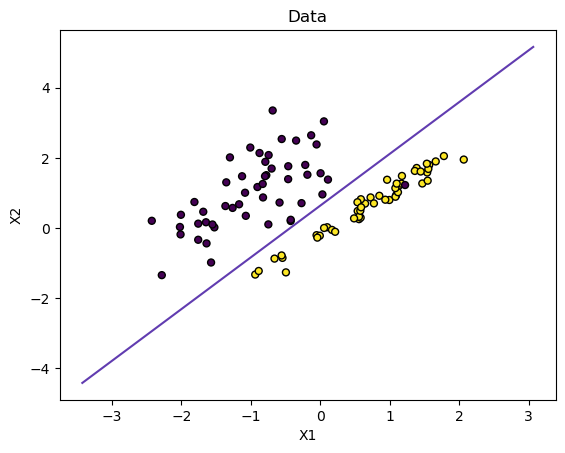

In [6]:
# Fit linear perceptron model
model = Perceptron()
model.fit(X=lin_df[['X1', 'X2']], y=lin_df['Y1'])

# Get model parameters (cefficients and intercept)
w = model.coef_[0]
b = model.intercept_[0]

x1_min, x1_max = lin_df['X1'].min() - 1, lin_df['X1'].max() + 1
x2_min, x2_max = lin_df['X1'].min() - 1, lin_df['X1'].max() + 1
x1 = np.linspace(x1_min, x1_max, 100)
x2 = -(w[0] * x1 + b) / w[1]

# plot the linear boundary!
plt.plot(x1, x2, color='#613CB0') 

# plot the data
plt.scatter(lin_df['X1'], lin_df['X2'], marker="o", c=lin_df['Y1'], s=25, edgecolor="k")

# label our axes!
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data")
plt.show()


## SVM Demo

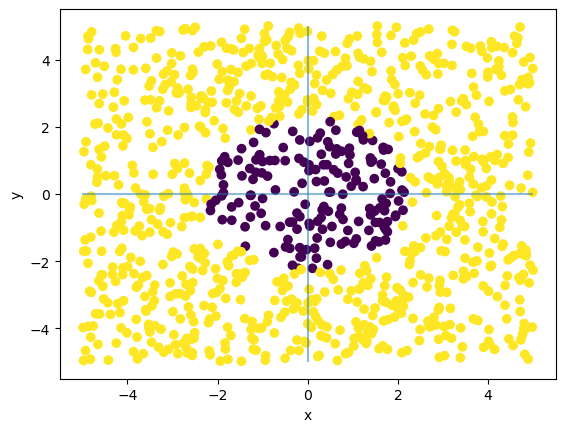

In [68]:
data = []
# randomly generate circular data
for i in range(0,1000):
    point = [np.random.uniform(-5,5),np.random.uniform(-5,5)]
    if point[0]**2 + point[1]**2 < 5:
        point.append(0)
    else:
        point.append(1)
    data.append(point)

data = np.asarray(data)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.vlines(0,-5,5,alpha=0.5); plt.hlines(0,-5,5,alpha=0.5)
plt.show()

In [69]:
X = data[:,:-1]
y = data[:,-1]
h = .02
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
# use radial kernal: rbf
classifier = SVC(kernel = 'rbf', gamma = 1)
classifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

KeyboardInterrupt: 

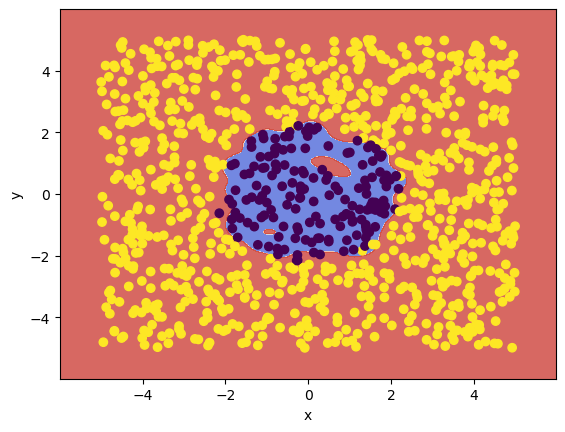

In [ ]:
# Change gamma
X = data[:,:-1]
y = data[:,-1]
h = .02
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
classifier = SVC(kernel = 'rbf', gamma = 7)
classifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html - understand gammas better

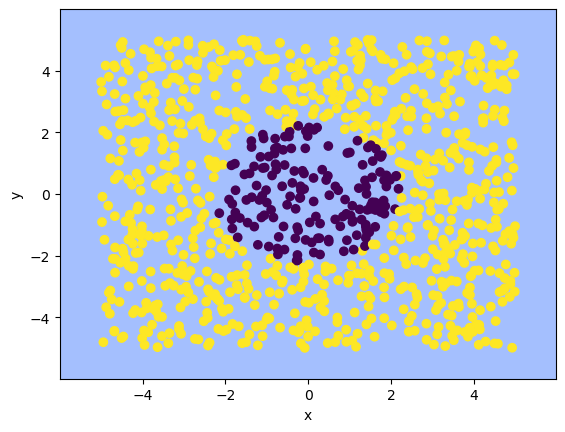

In [ ]:
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.show()

https://chrisalbon.com/code/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/ Nice blog post with effect of C and gamma on a different dataset